In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

df = pd.read_csv(r'raw_data.csv')

df['price_diff'] = (df['metered_price'] - df['upfront_price'])
df['duration_diff'] = (df['duration'] - df['predicted_duration'])
df['distance_diff'] = (df['distance'] - df['predicted_distance'])
df['velocity_fact'] = ((df['distance'] / 1000) / (df['duration'] / 3600))
df['velocity_pred'] = ((df['predicted_distance'] / 1000) / (df['predicted_duration'] / 3600))

eu_rides = df[df['eu_indicator'] == 1]
non_eu_rides = df[df['eu_indicator'] == 0]

# cnt 1415, 7 with ticket - 0,5%
eu_rides_overcharged = eu_rides[
    (eu_rides.price_diff > 0.0) 
    & (eu_rides.price_diff <= 
       (eu_rides.price_diff.mean() + (2*eu_rides.price_diff.std()))
      )
]

# cnt 243 - without upfront pricing, 4 with ticket - 1,6%
eu_rides_wo_upfront_price = eu_rides[(eu_rides.price_diff.isnull())]

# cnt 500, 50 with ticket - 10%
non_eu_rides_overcharged = non_eu_rides[
    (non_eu_rides.price_diff > 0.0) 
    & (non_eu_rides.price_diff <= 
       (non_eu_rides.price_diff.mean() + (2*non_eu_rides.price_diff.std()))
      )
]

# cnt 1291 rides without upfront price, 225 with ticket - 17,4%
non_eu_rides_wo_upfront_price = non_eu_rides[(non_eu_rides.price_diff.isnull())]

In [309]:
df[
    df.overpaid_ride_ticket == 1
].groupby(
    ['driver_app_version']
).filter(lambda g: len(g) > 0).groupby(
    ['driver_app_version']
).size().sort_values(ascending=False)

# df[
#     df.overpaid_ride_ticket == 1
# ].groupby(
#     ['rider_app_version']
# ).filter(lambda g: len(g) > 0).groupby(
#     ['rider_app_version']
# ).size().sort_values(ascending=False)

df[
    df.overpaid_ride_ticket == 1
].groupby(
    ['driver_app_version', 'rider_app_version']
).size().to_frame('size').reset_index().sort_values(
    ['driver_app_version', 'size'], ascending=[False, False])

df[
    df.overpaid_ride_ticket == 1
].groupby(
    ['rider_app_version', 'driver_app_version']
).size().to_frame('size').reset_index().sort_values(
    ['rider_app_version', 'size'], ascending=[False, False])


,rider_app_version,driver_app_version,size
157,CI.4.23,DA.4.16,1
158,CI.4.23,DA.4.42,1
156,CI.4.22,DA.4.42,2
153,CI.4.19,DA.4.39,12
155,CI.4.19,DA.4.42,7
152,CI.4.19,DA.4.37,3
154,CI.4.19,DA.4.41,3
148,CI.4.19,DA.4.14,2
149,CI.4.19,DA.4.22,1
150,CI.4.19,DA.4.31,1


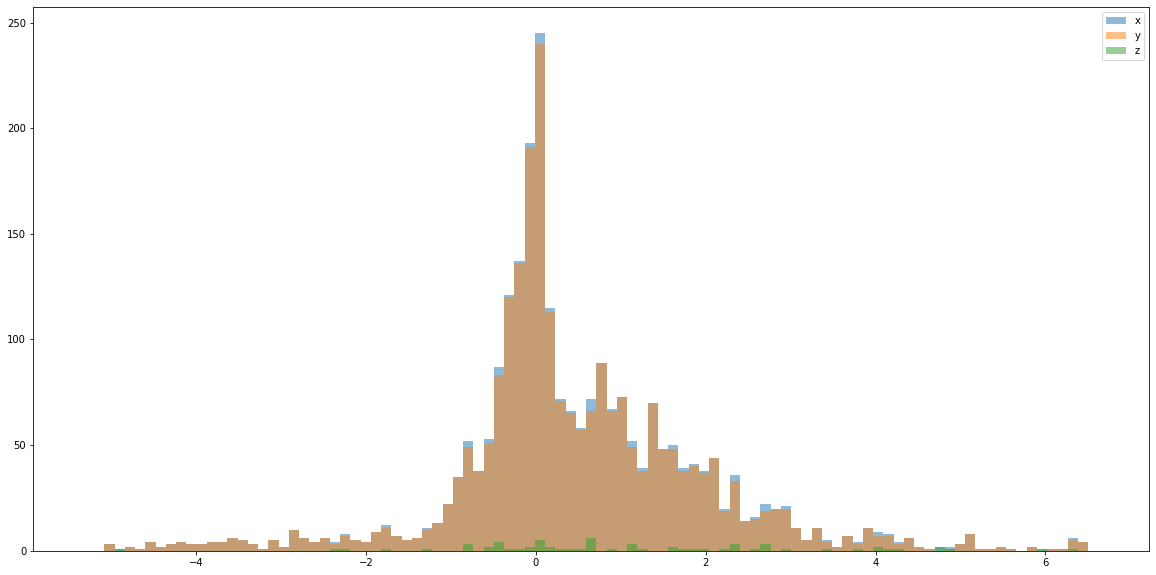

In [339]:
# PRICE_DIFF
left = (eu_rides.price_diff.mean() - (2*eu_rides.price_diff.std()))
right = (eu_rides.price_diff.mean() + (2*eu_rides.price_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(eu_rides.price_diff, bins, alpha=0.5, label='x')
plt.hist(eu_rides.price_diff[
    (eu_rides.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(eu_rides.price_diff[
    (eu_rides.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

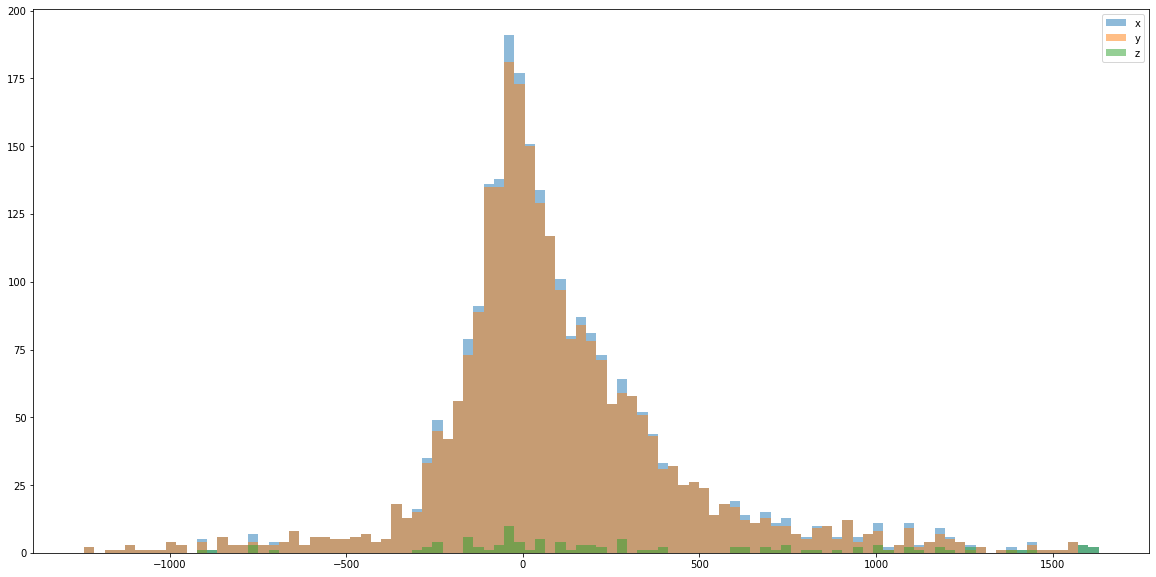

In [349]:
# EU_DURATION_DIFF_GENERAL
left = (eu_rides.duration_diff.mean() - (2*eu_rides.duration_diff.std()))
right = (eu_rides.duration_diff.mean() + (2*eu_rides.duration_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(eu_rides.duration_diff, bins, alpha=0.5, label='x')
plt.hist(eu_rides.duration_diff[
    (eu_rides.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(eu_rides.duration_diff[
    (eu_rides.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

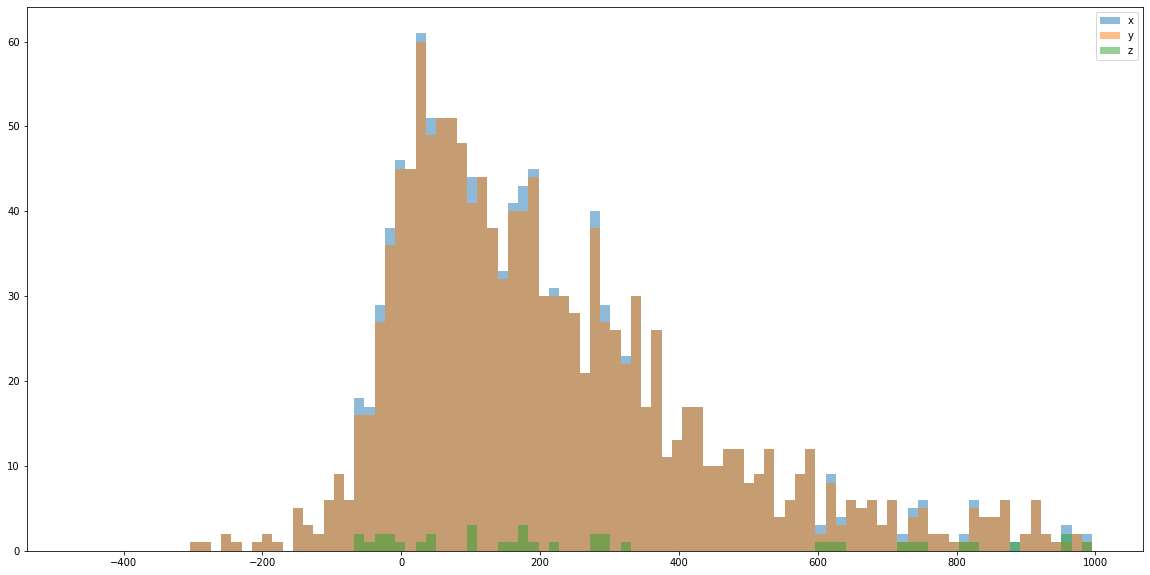

In [355]:
# EU_DURATION_DIFF_OVERCHARGED
left = (eu_rides_overcharged.duration_diff.mean() - (2*eu_rides_overcharged.duration_diff.std()))
right = (eu_rides_overcharged.duration_diff.mean() + (2*eu_rides_overcharged.duration_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(eu_rides_overcharged.duration_diff, bins, alpha=0.5, label='x')
plt.hist(eu_rides_overcharged.duration_diff[
    (eu_rides_overcharged.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(eu_rides_overcharged.duration_diff[
    (eu_rides_overcharged.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

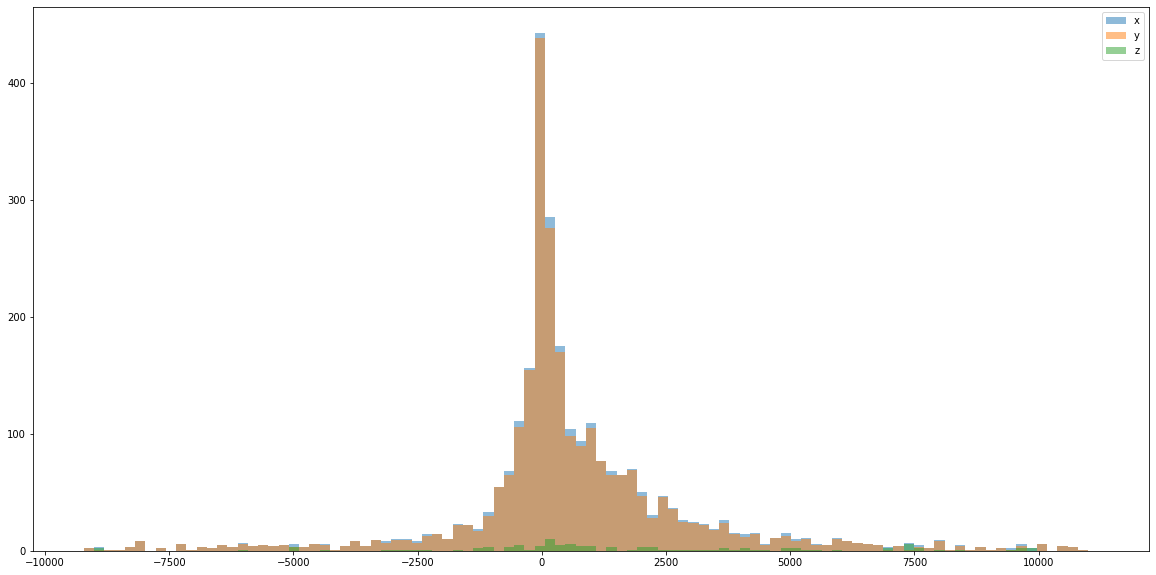

In [347]:
# EU_DISTANCE_DIFF_GENERAL
left = (eu_rides.distance_diff.mean() - (2*eu_rides.distance_diff.std()))
right = (eu_rides.distance_diff.mean() + (2*eu_rides.distance_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(eu_rides.distance_diff, bins, alpha=0.5, label='x')
plt.hist(eu_rides.distance_diff[
    (eu_rides.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(eu_rides.distance_diff[
    (eu_rides.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

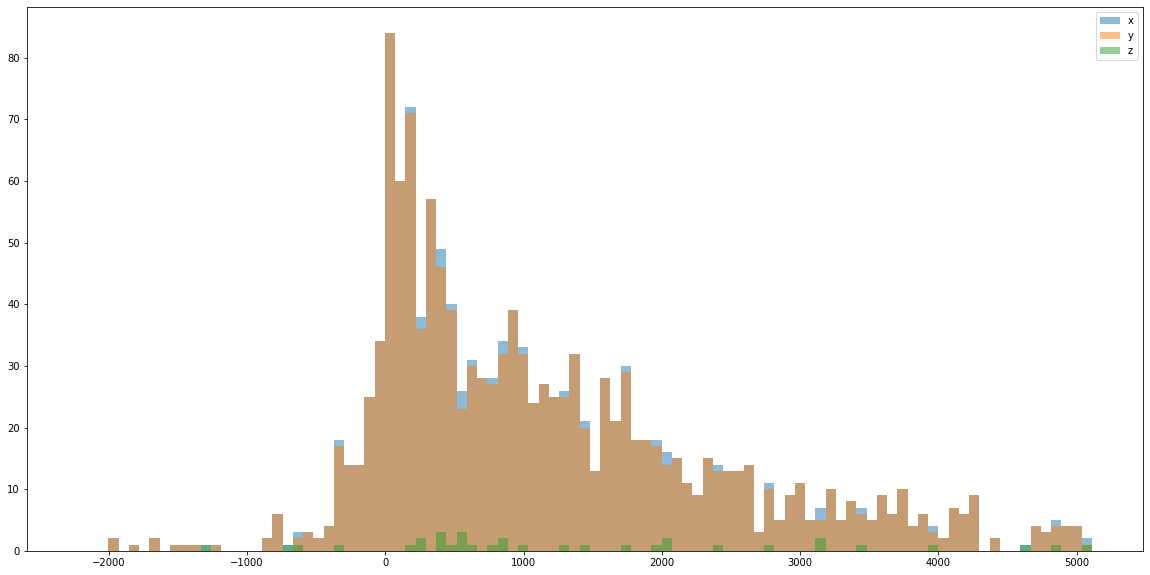

In [348]:
# EU_DISTANCE_DIFF_OVERCHARGED
left = (eu_rides_overcharged.distance_diff.mean() - (2*eu_rides_overcharged.distance_diff.std()))
right = (eu_rides_overcharged.distance_diff.mean() + (2*eu_rides_overcharged.distance_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(eu_rides_overcharged.distance_diff, bins, alpha=0.5, label='x')
plt.hist(eu_rides_overcharged.distance_diff[
    (eu_rides_overcharged.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(eu_rides_overcharged.distance_diff[
    (eu_rides_overcharged.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

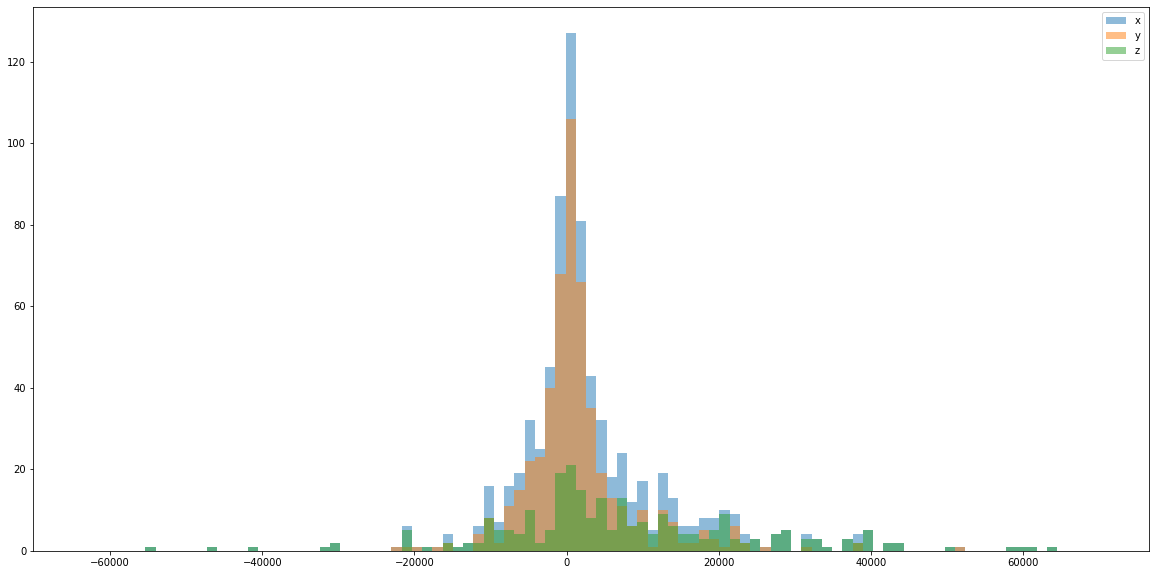

In [341]:
# NON_EU_PRICE_DIFF
left = (non_eu_rides.price_diff.mean() - (2*non_eu_rides.price_diff.std()))
right = (non_eu_rides.price_diff.mean() + (2*non_eu_rides.price_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(non_eu_rides.price_diff[
    (non_eu_rides.upfront_price != 6000.0)
], bins, alpha=0.5, label='x')
plt.hist(non_eu_rides.price_diff[
    (non_eu_rides.upfront_price != 6000.0)
    & (non_eu_rides.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(non_eu_rides.price_diff[
    (non_eu_rides.upfront_price != 6000.0)
    & (non_eu_rides.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

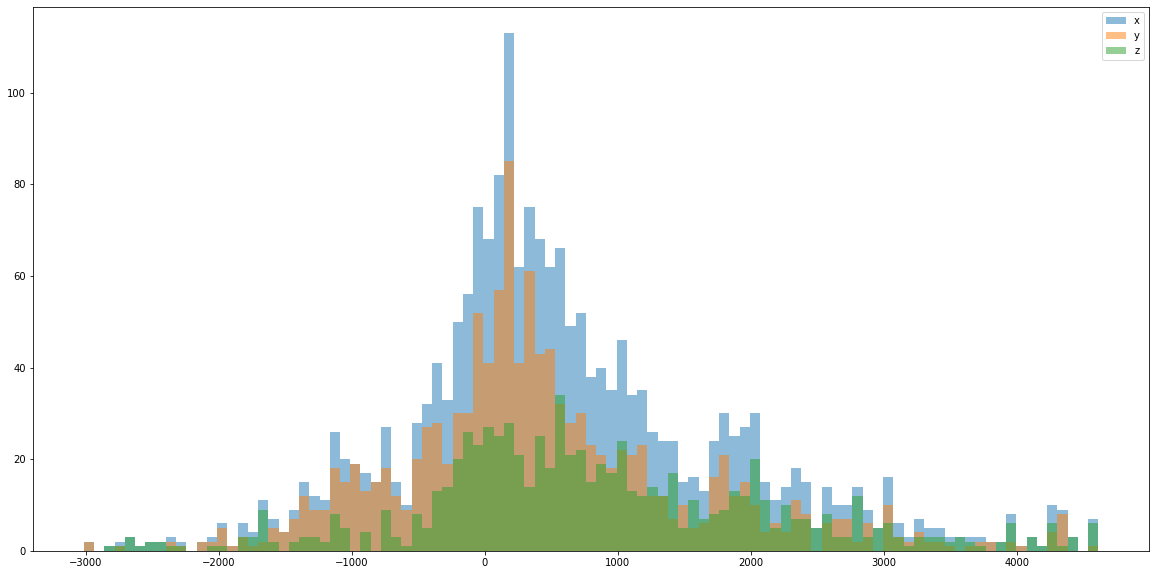

In [356]:
# NON_EU_DURATION_DIFF_GENERAL
left = (non_eu_rides.duration_diff.mean() - (2*non_eu_rides.duration_diff.std()))
right = (non_eu_rides.duration_diff.mean() + (2*non_eu_rides.duration_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(non_eu_rides.duration_diff[
    (non_eu_rides.upfront_price != 6000.0)
], bins, alpha=0.5, label='x')
plt.hist(non_eu_rides.duration_diff[
    (non_eu_rides.upfront_price != 6000.0)
    & (non_eu_rides.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(non_eu_rides.duration_diff[
    (non_eu_rides.upfront_price != 6000.0)
    & (non_eu_rides.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

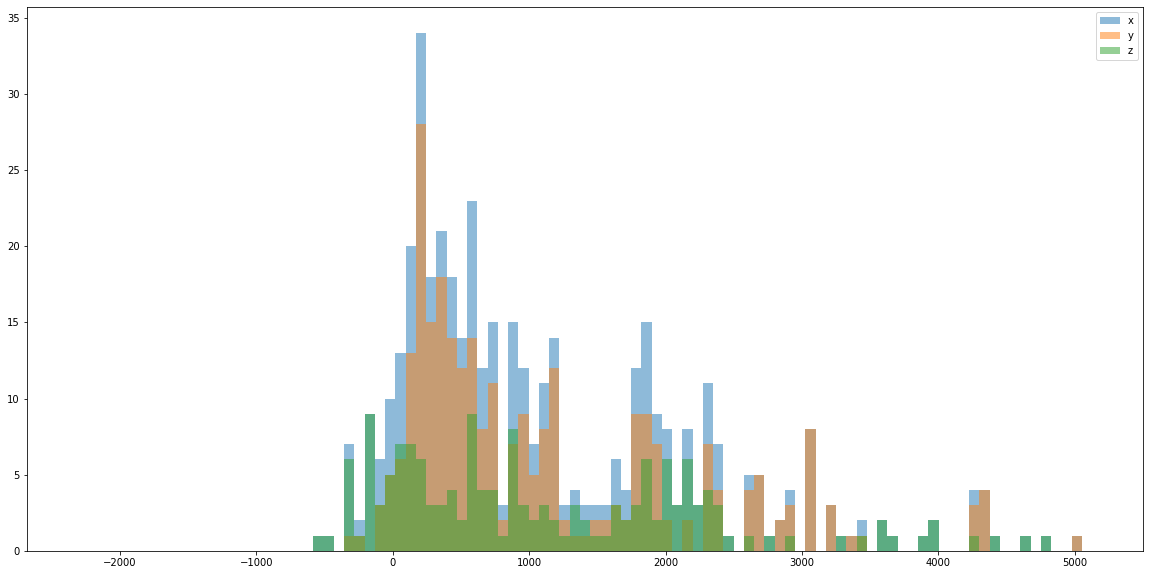

In [357]:
# NON_EU_DURATION_DIFF_OVERCHARGED
left = (non_eu_rides_overcharged.duration_diff.mean() - (2*non_eu_rides_overcharged.duration_diff.std()))
right = (non_eu_rides_overcharged.duration_diff.mean() + (2*non_eu_rides_overcharged.duration_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(non_eu_rides_overcharged.duration_diff[
    (non_eu_rides_overcharged.upfront_price != 6000.0)
], bins, alpha=0.5, label='x')
plt.hist(non_eu_rides_overcharged.duration_diff[
    (non_eu_rides_overcharged.upfront_price != 6000.0)
    & (non_eu_rides_overcharged.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(non_eu_rides_overcharged.duration_diff[
    (non_eu_rides_overcharged.upfront_price != 6000.0)
    & (non_eu_rides_overcharged.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

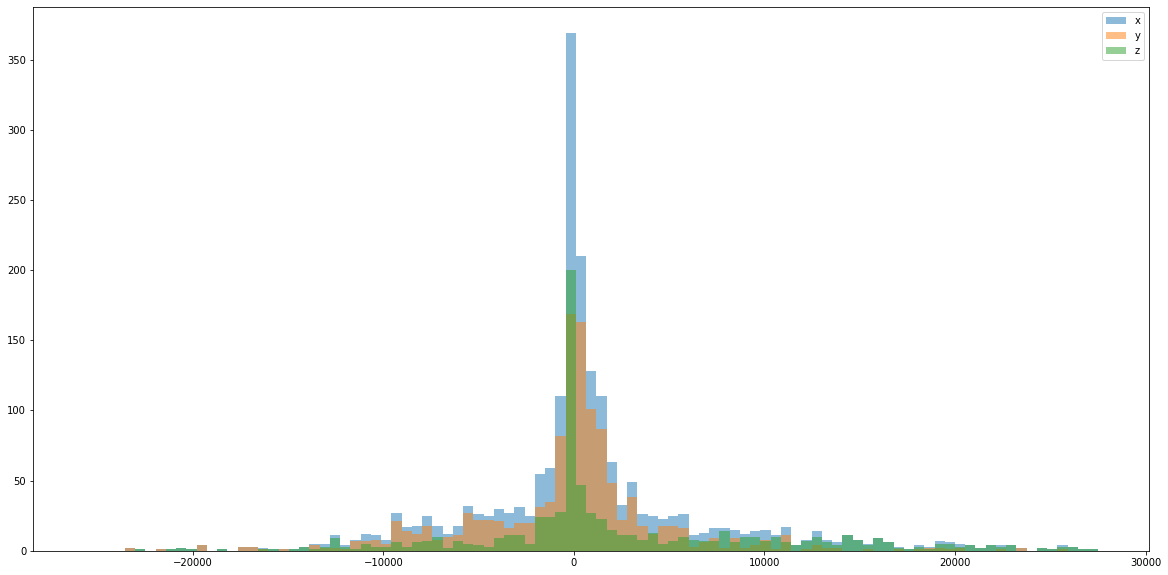

In [358]:
# NON_EU_DISTANCE_DIFF_GENERAL
left = (non_eu_rides.distance_diff.mean() - (2*non_eu_rides.distance_diff.std()))
right = (non_eu_rides.distance_diff.mean() + (2*non_eu_rides.distance_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(non_eu_rides.distance_diff[
    (non_eu_rides.upfront_price != 6000.0)
], bins, alpha=0.5, label='x')
plt.hist(non_eu_rides.distance_diff[
    (non_eu_rides.upfront_price != 6000.0)
    & (non_eu_rides.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(non_eu_rides.distance_diff[
    (non_eu_rides.upfront_price != 6000.0)
    & (non_eu_rides.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

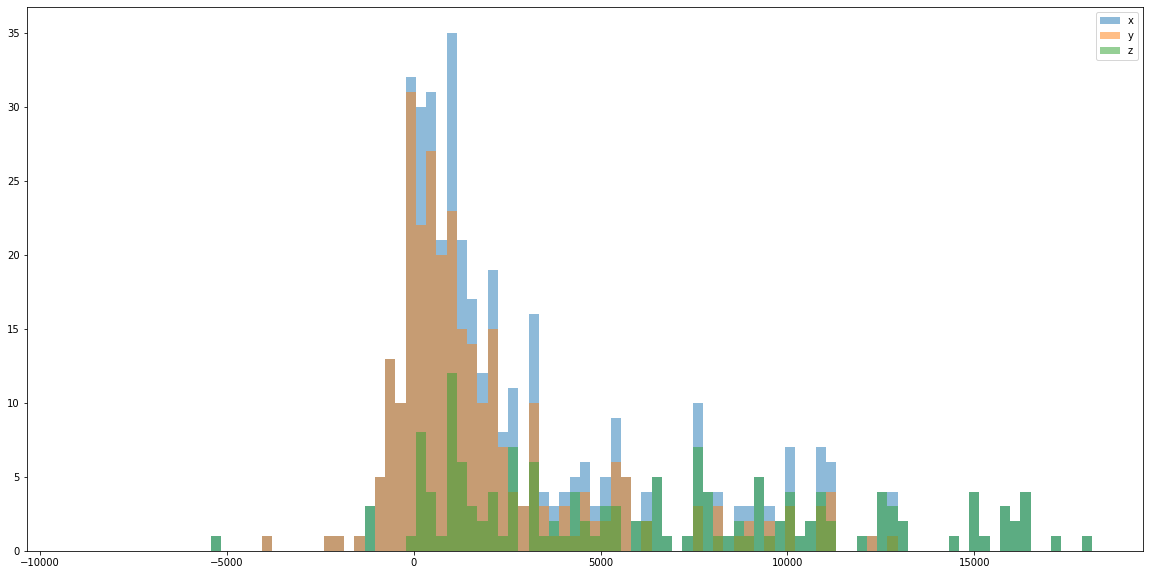

In [359]:
# NON_EU_DISTANCE_DIFF_OVERCHARGED
left = (non_eu_rides_overcharged.distance_diff.mean() - (2*non_eu_rides_overcharged.distance_diff.std()))
right = (non_eu_rides_overcharged.distance_diff.mean() + (2*non_eu_rides_overcharged.distance_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(non_eu_rides_overcharged.distance_diff[
    (non_eu_rides_overcharged.upfront_price != 6000.0)
], bins, alpha=0.5, label='x')
plt.hist(non_eu_rides_overcharged.distance_diff[
    (non_eu_rides_overcharged.upfront_price != 6000.0)
    & (non_eu_rides_overcharged.gps_confidence == 1)
], bins, alpha=0.5, label='y')
plt.hist(non_eu_rides_overcharged.distance_diff[
    (non_eu_rides_overcharged.upfront_price != 6000.0)
    & (non_eu_rides_overcharged.gps_confidence == 0)
], bins, alpha=0.5, label='z')
plt.legend(loc='upper right')
plt.show()

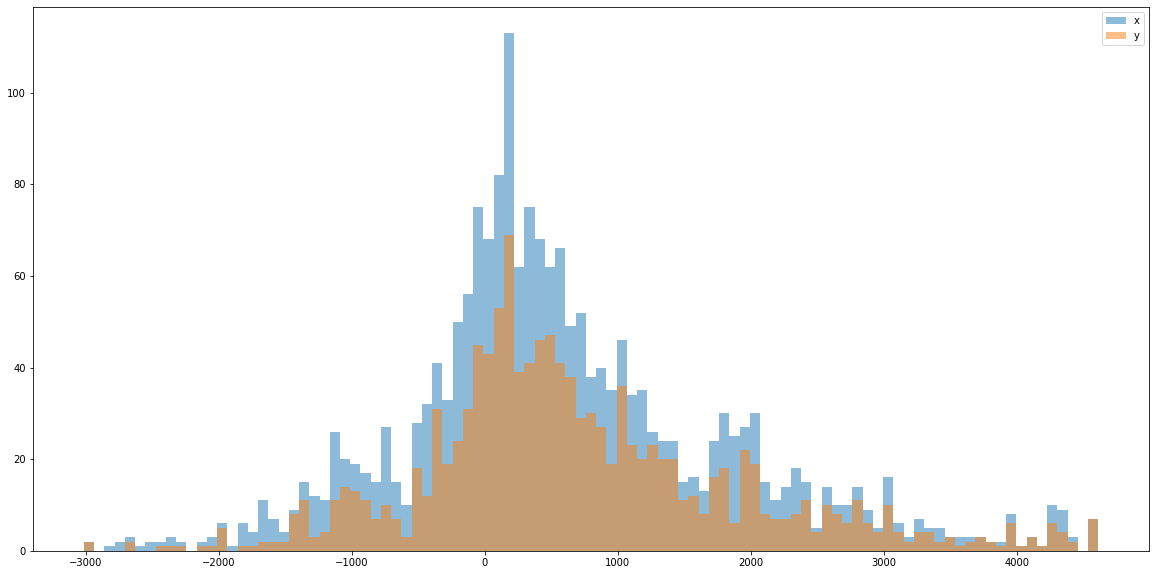

In [363]:
left = (non_eu_rides.duration_diff.mean() - (2*non_eu_rides.duration_diff.std()))
right = (non_eu_rides.duration_diff.mean() + (2*non_eu_rides.duration_diff.std()))
bins = np.linspace(left, right, 100)

plt.figure(figsize=(20,10))
plt.hist(non_eu_rides.duration_diff[
    (non_eu_rides.upfront_price != 6000.0)
], bins, alpha=0.5, label='x')
plt.hist(non_eu_rides_wo_upfront_price.duration_diff, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()